# importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore


# loading the dataset

In [134]:
df=pd.read_excel("cardetails2.xlsx")

In [135]:
df.sample(5)

,Brand,model,year,history,ownership,km_driven,fuel,transmission,location,price
1477,Maruti,Dzire,2018,Non-Accidental,1st,50254,Petrol,MANUAL,['Kolkata'],489399
4779,Maruti,Alto,2017,Non-Accidental,1st,30699,Petrol,MANUAL,['Chandigarh'],323399
4500,Hyundai,i10,2015,Non-Accidental,1st,11570,Diesel,MANUAL,['Ahmedabad'],390199
715,Skoda,Rapid,2021,Non-Accidental,1st,9999,Petrol,MANUAL,['Rohtak'],1132399
4099,Maruti,Swift,2011,Non-Accidental,2nd,26495,Petrol,MANUAL,"['New', 'Delhi']",281299


In [136]:
df.shape

(5242, 10)

the dataset contains 5242 rows and 10 columns

In [137]:
df['km_driven']=pd.to_numeric(df['km_driven'])

In [138]:
df.dtypes

Brand           object
model           object
year             int64
history         object
ownership       object
km_driven        int64
fuel            object
transmission    object
location        object
price            int64
dtype: object

there is a mix of object and int64 type data

In [91]:
df.isnull().sum()

Brand             0
model             0
year              0
history           0
ownership         0
km_driven         0
fuel              0
transmission    281
location          0
price             0
dtype: int64

transmission variable contains 281 null values

In [92]:
df.nunique()

Brand             19
model            106
year              14
history            1
ownership          3
km_driven       2764
fuel               2
transmission       3
location          25
price           2399
dtype: int64

In [124]:
df['transmission'].unique()

array(['MANUAL', 'AUTOMATIC', nan, 'HR-02-x-xxxx'], dtype=object)

In [154]:
df = df[df['transmission'] != "HR-02-x-xxxx"]

In [155]:
df['transmission'].unique()

array(['MANUAL', 'AUTOMATIC', nan], dtype=object)

In [133]:
df.shape

(5239, 10)

In [141]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Mercedes', 'KIA', 'MG', 'Tata', 'Nissan',
       'Renault', 'Honda', 'Mahindra', 'Datsun', 'Ford', 'Toyota',
       'Volkswagen', 'Jeep', 'Skoda', 'Audi', 'BMW', 'Fiat'], dtype=object)

In [142]:
df['model'].unique()

array(['Swift', 'Grand', 'i20', 'Eon', 'Ritz', 'Wagon', 'Benz', 'SELTOS',
       'HECTOR', 'CARENS', 'i10', 'ALTROZ', 'MAGNITE', 'VENUE', 'Kiger',
       'Brio', 'NEW', 'New', 'Baleno', 'NEXON', 'Tiago', 'Kwid', 'Alto',
       'Kuv100', 'Go', 'City', 'SONET', 'Jazz', 'Verna', 'Scorpio',
       'XUV500', 'Dzire', 'Figo', 'URBAN', 'Polo', 'Compass', 'Zen',
       'Creta', 'Ertiga', 'Ecosport', 'AURA', 'Celerio', 'Glanza', 'Ciaz',
       'Redi', 'Vitara', 'Elite', 'Amaze', 'T-ROC', 'S', 'WR-V',
       'Corolla', 'Etios', 'Vento', 'YARIS', 'Xcent', 'Fortuner', 'KUV',
       'XL6', 'GRAND', 'TIGOR', 'Thar', 'IGNIS', 'Tucson', 'Innova',
       'TIGUAN', 'TRIBER', 'Harrier', 'XUV', 'Duster', 'Rapid', 'Safari',
       'Ameo', 'Hexa', 'Q3', 'Octavia', 'A3', 'A6', 'Q5', 'A', 'Santro',
       'Endeavour', 'Micra', '5', 'CRV', 'Eeco', 'Civic', 'TUV300',
       'Camry', 'BOLERO', 'ALCAZAR', 'OMNI', 'TAIGUN', 'PUNCH', 'Kicks',
       'MARAZZO', 'SLAVIA', 'Terrano', 'Captur', 'FREESTYLE', 'BR-V',
   

In [143]:
df[df['model']=="3"]

,Brand,model,year,history,ownership,km_driven,fuel,transmission,location,price
4742,BMW,3,2013,Non-Accidental,1st,93590,Diesel,MANUAL,['Chandigarh'],1081599


In [144]:
df['fuel'].unique()

array(['Petrol', 'Diesel'], dtype=object)

In [145]:
df['history'].unique()

array(['Non-Accidental'], dtype=object)

In [146]:
df['ownership'].unique()

array(['2nd', '1st', '3rd'], dtype=object)

the above is clean and any unwanted column or date has been removed

#  EDA process

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Mercedes'),
  Text(3, 0, 'KIA'),
  Text(4, 0, 'MG'),
  Text(5, 0, 'Tata'),
  Text(6, 0, 'Nissan'),
  Text(7, 0, 'Renault'),
  Text(8, 0, 'Honda'),
  Text(9, 0, 'Mahindra'),
  Text(10, 0, 'Datsun'),
  Text(11, 0, 'Ford'),
  Text(12, 0, 'Toyota'),
  Text(13, 0, 'Volkswagen'),
  Text(14, 0, 'Jeep'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Audi'),
  Text(17, 0, 'BMW'),
  Text(18, 0, 'Fiat')])

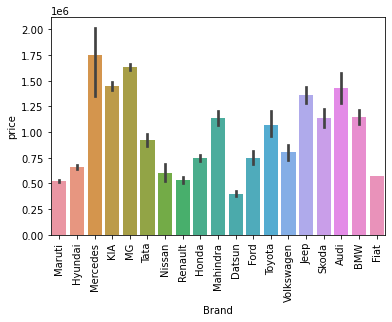

In [147]:
sns.barplot(x=df['Brand'],y=df['price'])
plt.xticks(rotation=90)

from the plot we can see that cars of expensive brands like BMW , Mercedes,MG, Audi, Skoda have high price 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2010'),
  Text(2, 0, '2011'),
  Text(3, 0, '2012'),
  Text(4, 0, '2013'),
  Text(5, 0, '2014'),
  Text(6, 0, '2015'),
  Text(7, 0, '2016'),
  Text(8, 0, '2017'),
  Text(9, 0, '2018'),
  Text(10, 0, '2019'),
  Text(11, 0, '2020'),
  Text(12, 0, '2021'),
  Text(13, 0, '2022')])

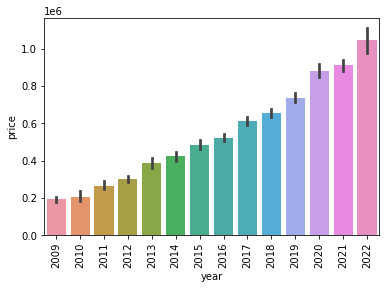

In [148]:
sns.barplot(x=df['year'],y=df['price'])
plt.xticks(rotation=90)

from the bar chart, it can be observed that as the car gets old, the resale value decreases, 
the resale price is high for cars of 2022 as manufacturing year

(array([0, 1, 2]), [Text(0, 0, '2nd'), Text(1, 0, '1st'), Text(2, 0, '3rd')])

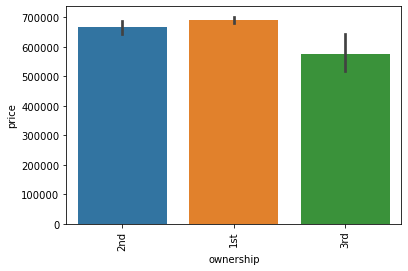

In [149]:
sns.barplot(x=df['ownership'],y=df['price'])
plt.xticks(rotation=90)

we can see that the price of the cars are slightly high for 1 st ownership

(array([0, 1]), [Text(0, 0, 'Petrol'), Text(1, 0, 'Diesel')])

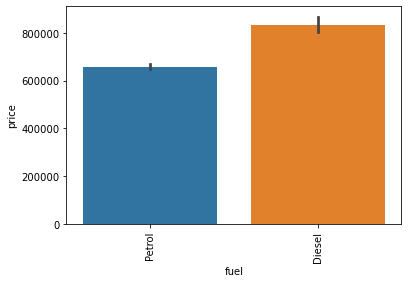

In [150]:
sns.barplot(x=df['fuel'],y=df['price'])
plt.xticks(rotation=90)

the resale price diesel cars are higher

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, "['New', 'Delhi']"),
  Text(1, 0, "['Noida']"),
  Text(2, 0, "['Ghaziabad']"),
  Text(3, 0, "['Faridabad']"),
  Text(4, 0, "['Gurgaon']"),
  Text(5, 0, "['Panipat']"),
  Text(6, 0, "['Rohtak']"),
  Text(7, 0, "['Rewari']"),
  Text(8, 0, "['Sonipat']"),
  Text(9, 0, "['Mumbai']"),
  Text(10, 0, "['Nasik']"),
  Text(11, 0, "['Pune']"),
  Text(12, 0, "['North', '24', 'Parganas']"),
  Text(13, 0, "['Kolkata']"),
  Text(14, 0, "['Howrah']"),
  Text(15, 0, "['Hooghly']"),
  Text(16, 0, "['Chennai']"),
  Text(17, 0, "['Vadodara']"),
  Text(18, 0, "['Ahmedabad']"),
  Text(19, 0, "['Gandhinagar']"),
  Text(20, 0, "['Rajkot']"),
  Text(21, 0, "['Surat']"),
  Text(22, 0, "['Jaipur']"),
  Text(23, 0, "['Chandigarh']"),
  Text(24, 0, "['Ludhiana']")])

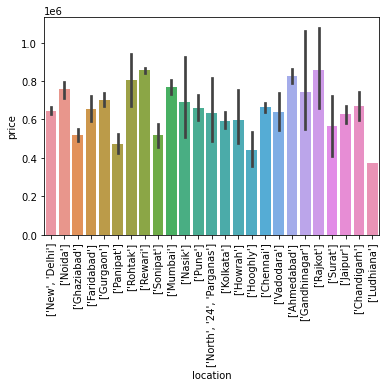

In [151]:
sns.barplot(x=df['location'],y=df['price'])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'MANUAL'), Text(1, 0, 'AUTOMATIC')])

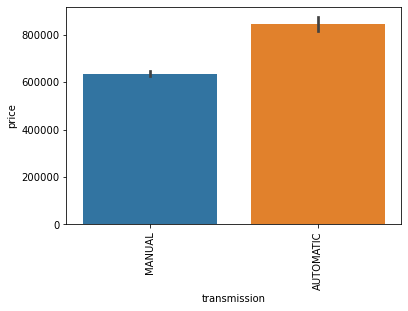

In [156]:
sns.barplot(x=df['transmission'],y=df['price'])
plt.xticks(rotation=90)

cars with automatic transmission have higher price

(array([0]), [Text(0, 0, 'Non-Accidental')])

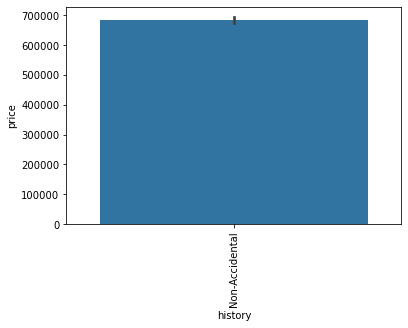

In [168]:
sns.barplot(x=df['history'],y=df['price'])
plt.xticks(rotation=90)

there is only 1 value so we can drop this column

In [169]:
df.drop(['history'],axis=1,inplace=True)

## imputation

In [158]:
from sklearn.impute import SimpleImputer

In [159]:
imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")

In [161]:
df['transmission']=imp.fit_transform(df['transmission'].values.reshape(-1,1))

In [170]:
df.isnull().sum()

Brand           0
model           0
year            0
ownership       0
km_driven       0
fuel            0
transmission    0
location        0
price           0
dtype: int64

null values have been removed

## label encoding

In [166]:
from sklearn.preprocessing import LabelEncoder

In [167]:
le=LabelEncoder()

In [171]:
list=["Brand","model","year","ownership","fuel","transmission","location"]
for i in list:
    df[i]=le.fit_transform(df[i])

## Descriptive Statistics

In [172]:
df.describe()

,Brand,model,year,ownership,km_driven,fuel,transmission,location,price
count,5239.000000,5239.000000,5239.000000,5239.000000,5239.000000,5239.000000,5239.000000,5239.000000,5.239000e+03
mean,9.594006,48.456957,8.908761,0.232678,38616.262646,0.859897,0.832220,8.928421,6.835562e+05
std,3.590468,30.407447,2.466824,0.464338,25136.663699,0.347127,0.373707,5.877620,3.738273e+05
min,0.000000,0.000000,0.000000,0.000000,202.000000,0.000000,0.000000,0.000000,1.390990e+05
25%,6.000000,23.000000,8.000000,0.000000,18227.500000,1.000000,1.000000,2.000000,4.341990e+05
50%,11.000000,43.000000,9.000000,0.000000,34469.000000,1.000000,1.000000,10.000000,5.767990e+05
75%,11.000000,79.000000,11.000000,0.000000,54771.500000,1.000000,1.000000,14.000000,8.100490e+05
max,18.000000,105.000000,13.000000,2.000000,242614.000000,1.000000,1.000000,24.000000,3.131049e+06


we can see some outliers are present from the difference between 75th quartile and max value

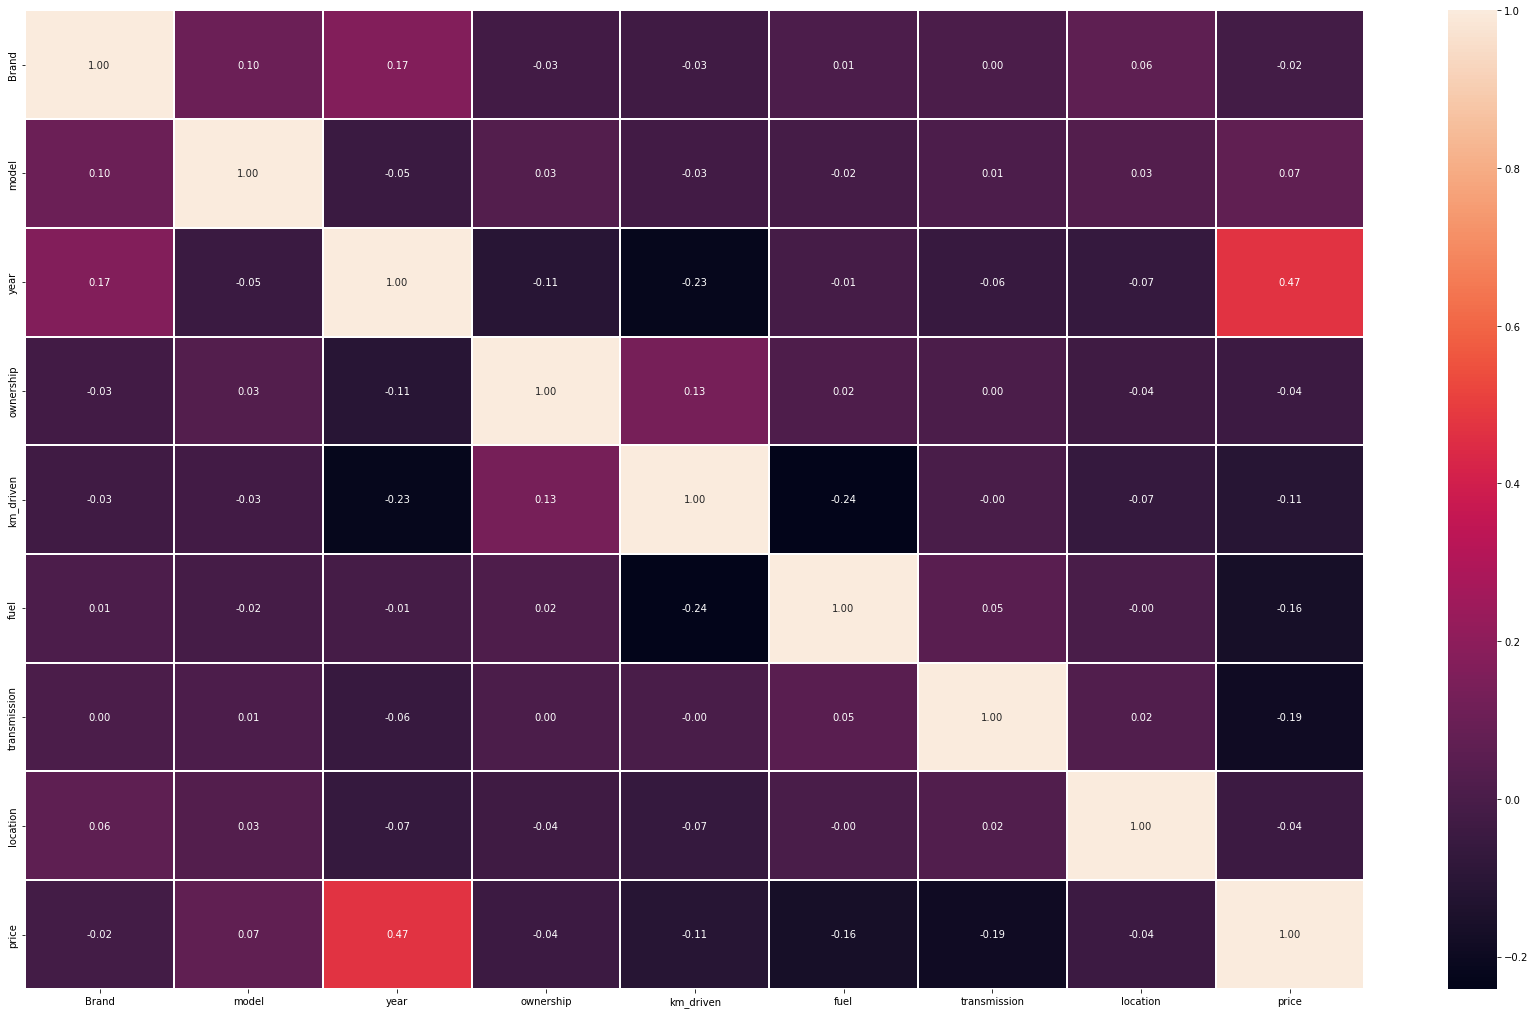

In [173]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [174]:
df.corr()["price"].sort_values()

transmission   -0.192311
fuel           -0.164839
km_driven      -0.110907
ownership      -0.043865
location       -0.043600
Brand          -0.018250
model           0.068028
year            0.468412
price           1.000000
Name: price, dtype: float64

ownership, locatio and brand has the least correlation

# distribution plot

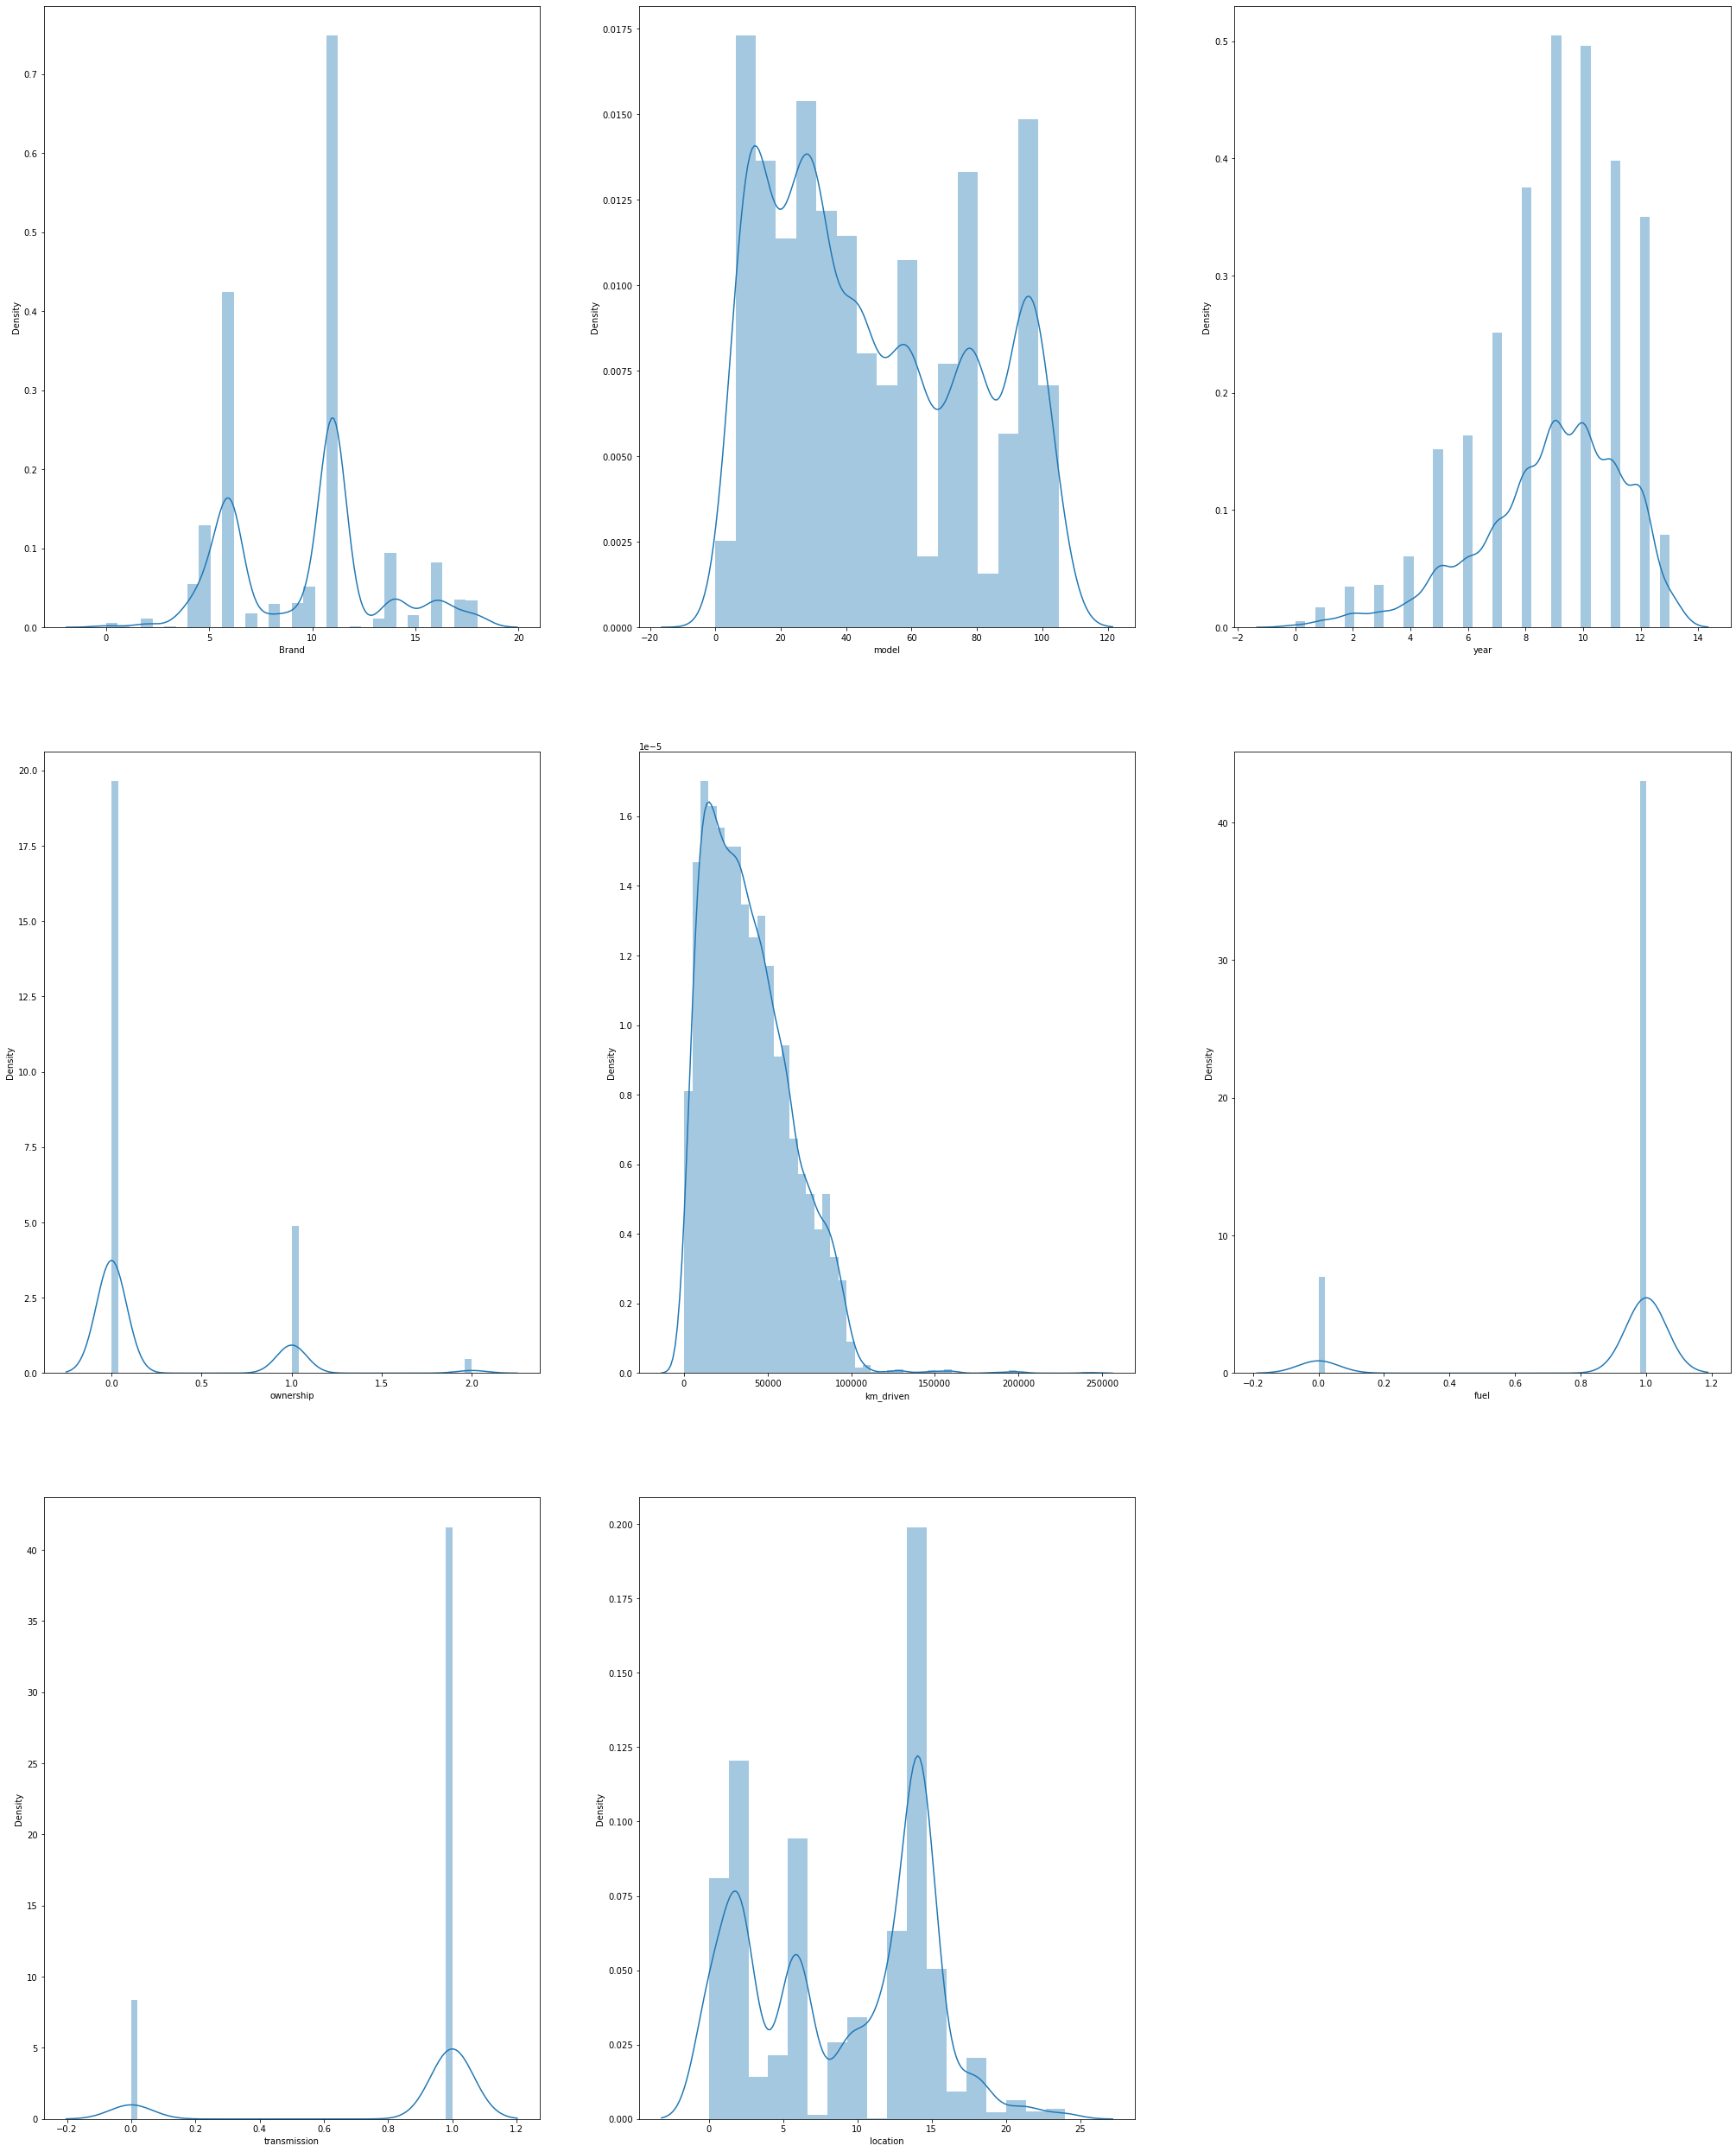

In [179]:
plt.figure(figsize=(35,45))
count =1
for column in df:
    if count <= 8:
        ax = plt.subplot(3,3,count)
        sns.distplot(df[column])
        plt.xlabel(column) 
    count+=1
plt.show()

skewness is present and the data are not normally distributed

## Boxplot

Brand              AxesSubplot(0.125,0.657941;0.227941x0.222059)
model           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
year            AxesSubplot(0.672059,0.657941;0.227941x0.222059)
ownership          AxesSubplot(0.125,0.391471;0.227941x0.222059)
km_driven       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
fuel            AxesSubplot(0.672059,0.391471;0.227941x0.222059)
transmission          AxesSubplot(0.125,0.125;0.227941x0.222059)
location           AxesSubplot(0.398529,0.125;0.227941x0.222059)
price              AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

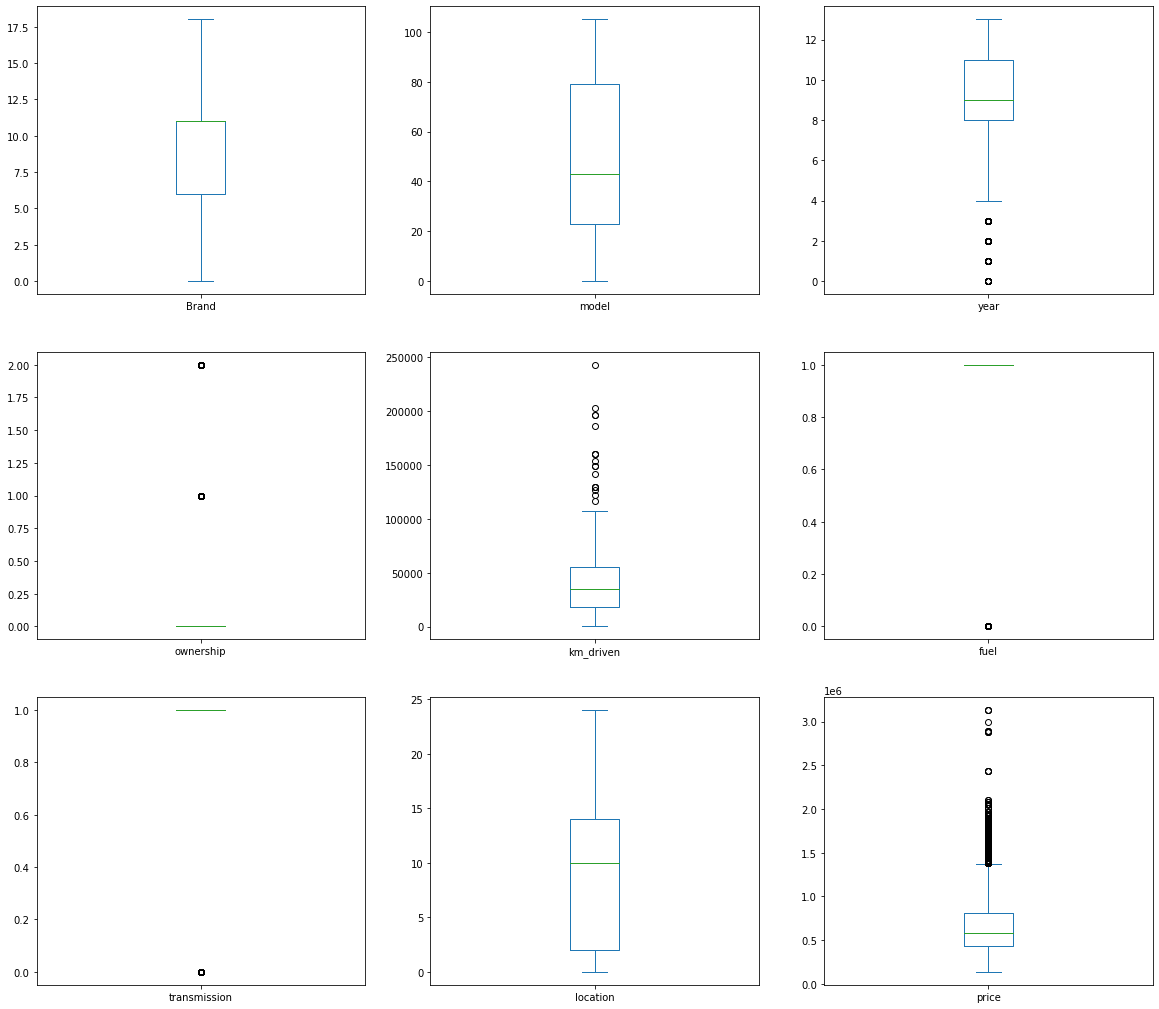

In [180]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(20,18))

outliers are present, which will lead to inaccuracy

# Zscore method for removal of outliers

In [181]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [182]:
np.where(z>3)

(array([   3,   12,   48,   50,   59,   69,   87,   94,   95,  110,  129,
         155,  200,  203,  232,  250,  347,  363,  370,  395,  398,  405,
         448,  523,  567,  569,  604,  605,  617,  848,  863,  864,  872,
         873,  874,  877,  915,  969,  971, 1014, 1084, 1095, 1107, 1125,
        1184, 1249, 1273, 1333, 1334, 1335, 1337, 1345, 1351, 1357, 1371,
        1375, 1391, 1426, 1444, 1448, 1546, 1562, 1625, 1626, 1630, 1639,
        1640, 1682, 1685, 1693, 1709, 1730, 1731, 1743, 1748, 1764, 1772,
        1811, 1827, 1839, 1852, 1943, 1985, 2023, 2024, 2060, 2069, 2079,
        2087, 2092, 2105, 2143, 2149, 2186, 2250, 2258, 2279, 2304, 2324,
        2332, 2384, 2385, 2393, 2403, 2452, 2514, 2522, 2563, 2569, 2589,
        2592, 2601, 2671, 2716, 2722, 2725, 2742, 2766, 2824, 2826, 2867,
        2867, 2885, 2973, 3172, 3176, 3199, 3202, 3217, 3230, 3235, 3239,
        3245, 3253, 3264, 3267, 3280, 3305, 3306, 3314, 3324, 3373, 3435,
        3443, 3484, 3490, 3510, 3513, 

In [194]:
dfnew=df[(z<3).all(axis=1)]

In [184]:
dfnew.shape

(5019, 9)

data loss=(5242-5019)/5242*100=4%

# skewness removal

In [185]:
dfnew.skew().sort_values()

fuel           -2.106171
transmission   -1.786504
year           -0.638418
location       -0.078563
Brand           0.186312
model           0.329253
km_driven       0.571603
price           1.344007
ownership       1.504815
dtype: float64

In [186]:
list=["fuel","transmission","ownership"]

In [195]:
for i in list:
    if dfnew.skew().loc[i]>0.5:
        dfnew[i]=np.log1p(dfnew[i])

In [196]:
dfnew.skew().sort_values()

fuel           -2.106171
transmission   -1.786504
year           -0.638418
location       -0.078563
Brand           0.186312
model           0.329253
km_driven       0.571603
price           1.344007
ownership       1.504815
dtype: float64

# Splitting of data

In [197]:
x=dfnew.drop(["price"],axis=1)
y=dfnew["price"]

# application of ML algorithms

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [207]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((r2_score(y_test,pred_test))>maxacc):
            maxacc=r2_score(y_test,pred_test)
            rs=i
        print(f"at random state {i}, training accuracy is {r2_score(y_train,pred_train)}")
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

## LinearRegression

In [208]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)

at random state 0, training accuracy is 0.30593118561881294
at random state 0, testing accuracy is 0.32989968072163933


at random state 1, training accuracy is 0.3163620134276228
at random state 1, testing accuracy is 0.30202858783008313


at random state 2, training accuracy is 0.3216052872509678
at random state 2, testing accuracy is 0.29266604113205597


at random state 3, training accuracy is 0.3115150850875441
at random state 3, testing accuracy is 0.3166564294003301


at random state 4, training accuracy is 0.3157707906383921
at random state 4, testing accuracy is 0.30535468993285053


at random state 5, training accuracy is 0.3156149837375575
at random state 5, testing accuracy is 0.30619160607731366


at random state 6, training accuracy is 0.3165556824598529
at random state 6, testing accuracy is 0.303084418549028


at random state 7, training accuracy is 0.30745443764157576
at random state 7, testing accuracy is 0.32322852893599274


at random state 8, training accuracy is 0

at random state 76, training accuracy is 0.3075433310987459
at random state 76, testing accuracy is 0.3259677536552229


at random state 77, training accuracy is 0.33246143996479915
at random state 77, testing accuracy is 0.26751527453281754


at random state 78, training accuracy is 0.31945594130365085
at random state 78, testing accuracy is 0.29872666528304936


at random state 79, training accuracy is 0.3109399709953765
at random state 79, testing accuracy is 0.31677157377857146


at random state 80, training accuracy is 0.314036866742192
at random state 80, testing accuracy is 0.3108423345959639


at random state 81, training accuracy is 0.31203916413903166
at random state 81, testing accuracy is 0.3140371239815186


at random state 82, training accuracy is 0.32010742081302523
at random state 82, testing accuracy is 0.2960837116706444


at random state 83, training accuracy is 0.31534214605338073
at random state 83, testing accuracy is 0.3073414046779659


at random state 84, train

CV score

In [209]:
score=cross_val_score(lm,x,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[0.355912   0.35127783 0.16652435 0.17670199]
0.26260404248407937
0.09107673255495904


## Random forest regressor

In [210]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
model_selection(rfr)

at random state 0, training accuracy is 0.989245646563632
at random state 0, testing accuracy is 0.898022740627378


at random state 1, training accuracy is 0.9882427318147191
at random state 1, testing accuracy is 0.9160825717487796


at random state 2, training accuracy is 0.9880562735347482
at random state 2, testing accuracy is 0.8980430575255114


at random state 3, training accuracy is 0.9879920100565082
at random state 3, testing accuracy is 0.9185569358983929


at random state 4, training accuracy is 0.988924002879632
at random state 4, testing accuracy is 0.8971966774062108


at random state 5, training accuracy is 0.9874591353079479
at random state 5, testing accuracy is 0.923305334938551


at random state 6, training accuracy is 0.9881615080662659
at random state 6, testing accuracy is 0.9155571790268153


at random state 7, training accuracy is 0.9887939667486131
at random state 7, testing accuracy is 0.9167509372939578


at random state 8, training accuracy is 0.9877561382

at random state 69, training accuracy is 0.9883365650781611
at random state 69, testing accuracy is 0.9120317908516244


at random state 70, training accuracy is 0.9874358914574142
at random state 70, testing accuracy is 0.9216357228826952


at random state 71, training accuracy is 0.9886184342574007
at random state 71, testing accuracy is 0.913618930473795


at random state 72, training accuracy is 0.9891386413418517
at random state 72, testing accuracy is 0.9064909728521031


at random state 73, training accuracy is 0.9882568686779469
at random state 73, testing accuracy is 0.9097404935433723


at random state 74, training accuracy is 0.9889331377493339
at random state 74, testing accuracy is 0.9041440243793546


at random state 75, training accuracy is 0.9874878206154181
at random state 75, testing accuracy is 0.9082711524661123


at random state 76, training accuracy is 0.9873087393291452
at random state 76, testing accuracy is 0.9322775407300652


at random state 77, training accu

CV score

In [212]:
score=cross_val_score(rfr,x,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.93031972 0.84249473 0.94804399 0.9826436  0.95738318 0.88303628]
0.9239869172117214
0.047421330380892274


## Ada Boost Regressor

In [215]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
model_selection(ad)

at random state 0, training accuracy is 0.4848442976369345
at random state 0, testing accuracy is 0.44446861172629293


at random state 1, training accuracy is 0.5508343146523275
at random state 1, testing accuracy is 0.5345368521363133


at random state 2, training accuracy is 0.5812933448385034
at random state 2, testing accuracy is 0.5549705714097912


at random state 3, training accuracy is 0.5336828926639996
at random state 3, testing accuracy is 0.5267042289956296


at random state 4, training accuracy is 0.5395107232339954
at random state 4, testing accuracy is 0.5293796586116252


at random state 5, training accuracy is 0.5351117955275496
at random state 5, testing accuracy is 0.532338226625771


at random state 6, training accuracy is 0.5431711580334105
at random state 6, testing accuracy is 0.5426406659258869


at random state 7, training accuracy is 0.36722614045001345
at random state 7, testing accuracy is 0.39701395705391807


at random state 8, training accuracy is 0.3903

at random state 68, training accuracy is 0.45029446098452686
at random state 68, testing accuracy is 0.4297369562618012


at random state 69, training accuracy is 0.4539914515580773
at random state 69, testing accuracy is 0.47620322477797716


at random state 70, training accuracy is 0.466579554635132
at random state 70, testing accuracy is 0.46186059496250453


at random state 71, training accuracy is 0.5615339931565699
at random state 71, testing accuracy is 0.5531402167390564


at random state 72, training accuracy is 0.5647697717094121
at random state 72, testing accuracy is 0.5665672542037308


at random state 73, training accuracy is 0.5516475390240396
at random state 73, testing accuracy is 0.5215364332455141


at random state 74, training accuracy is 0.5768238967970514
at random state 74, testing accuracy is 0.5499783281946944


at random state 75, training accuracy is 0.5455182413697908
at random state 75, testing accuracy is 0.48418621896227865


at random state 76, training 

CV score

In [216]:
score=cross_val_score(ad,x,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.47524022 0.53026811 0.58786586 0.52385354 0.48137035 0.45037941]
0.508162915923907
0.04514435022428462


## hyper parameter tuning

In [217]:
from sklearn.model_selection import GridSearchCV

In [223]:
dict={"n_estimators":[200,300],
      "criterion":['squared_error', 'absolute_error','poisson'], 
      "max_features":['sqrt', 'log2'],
      "max_depth":[15,17,20]}
      #,"max_fetaures":['sqrt','log2']}

In [224]:
gd=GridSearchCV(estimator=rfr,param_grid=dict,cv=6)

In [225]:
gd.fit(x,y)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [15, 17, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [226]:
gd.best_params_

{'criterion': 'poisson',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 300}

In [227]:
gd.best_score_

0.8979960841417123

# Final model

In [228]:
rfr=RandomForestRegressor(criterion='poisson',max_depth=20,max_features= 'log2',n_estimators= 300)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=76,test_size=0.30)
instance=rfr
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)

print(f"at random state {76} testing accuracy is {r2_score(y_test,pred_test)}")


at random state 76 testing accuracy is 0.9038303912625187


# visualisation

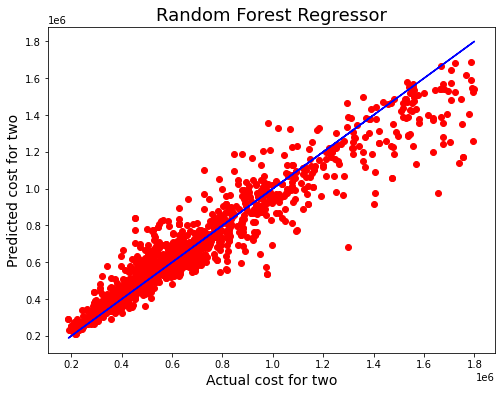

In [229]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual cost for two',fontsize= 14)
plt.ylabel('Predicted cost for two',fontsize= 14)
plt.title('Random Forest Regressor',fontsize= 18)
plt.show()

# Prediction

In [230]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred_test})
dfpred.sample(40)

,Expected,Predicted
4175,1438899,1.473403e+06
2451,626999,8.086867e+05
1888,1078399,9.290412e+05
4451,509499,4.651190e+05
1298,880799,7.851927e+05
4340,482499,4.343397e+05
2897,360499,4.268571e+05
3643,596999,5.625298e+05
4642,733499,7.002976e+05
301,340799,3.613199e+05


# Model saving

In [231]:
import pickle
filename = 'car_price.pkl'
pickle.dump(rfr,open(filename, 'wb'))